In [442]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [443]:
df = pd.read_csv("train.csv")

In [444]:
df.shape

(891, 12)

In [445]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


**Drop columns**

In [446]:
#we dont need name,ticket, id
df.drop(["Ticket","Name","PassengerId"],inplace=True, axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [447]:
#we need to remove survived column to be the last column

columns = df.columns.tolist()
columns


['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Embarked']

In [448]:
columns.append(columns.pop(0))
columns

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Embarked',
 'Survived']

In [449]:
df=df[columns]
df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,female,38.0,1,0,71.2833,C85,C,1


In [450]:
#now we need to check for null values
null_sum=df.isnull().sum()
null_ratio=null_sum/ df.shape[0]
pd.DataFrame([null_sum,null_ratio],index=["null_sum","null_ratio"])

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
null_sum,0.0,0.0,177.000000,0.0,0.0,0.0,687.000000,2.000000,0.0
null_ratio,0.0,0.0,0.198653,0.0,0.0,0.0,0.771044,0.002245,0.0


In [451]:
#check for the datatypes & numbers of unique values
pd.DataFrame([df.nunique(),df.dtypes],index=["num_nique","data_type"])

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
num_nique,3,2,88,7,7,248,147,3,2
data_type,int64,object,float64,int64,int64,float64,object,object,int64


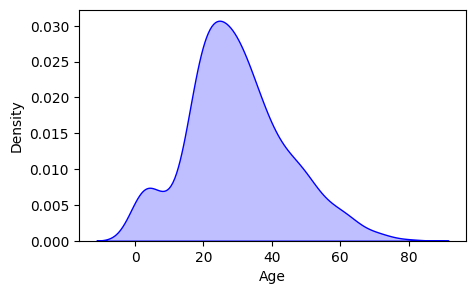

In [452]:
# Age column distribution
plt.figure(figsize=(5, 3))
sns.kdeplot(df['Age'], color="blue", fill=True)
plt.show()

In [453]:
#We can see that the age distribution is right tail

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [455]:
#handle null values
#replace null values in age column with median
median = df["Age"].median()
df["Age"].fillna(median, inplace=True)

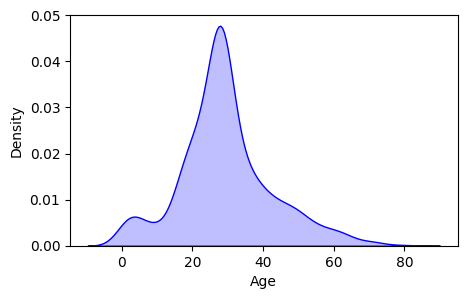

In [456]:
# Age column distribution after adding median
plt.figure(figsize=(5, 3))
sns.kdeplot(df['Age'], color="blue", fill=True)
plt.show()

In [457]:
# drop Cabin column because 0.771044% is missed
df = df.drop("Cabin", axis=1)

In [458]:
# drop rows with null value in Embarked row
df = df.dropna(subset=['Embarked'])

In [459]:
#handle some data-types

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    object 
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
 7   Survived  889 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [461]:
#change datatype of some columns to category
colu=["Pclass" ,"Sex","SibSp","Parch","Embarked","Survived"]
df[colu]=df[colu].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    889 non-null    category
 1   Sex       889 non-null    category
 2   Age       889 non-null    float64 
 3   SibSp     889 non-null    category
 4   Parch     889 non-null    category
 5   Fare      889 non-null    float64 
 6   Embarked  889 non-null    category
 7   Survived  889 non-null    category
dtypes: category(6), float64(2)
memory usage: 27.2 KB


In [462]:
df[colu]

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,1,0,S,0
1,1,female,1,0,C,1
2,3,female,0,0,S,1
3,1,female,1,0,S,1
4,3,male,0,0,S,0
...,...,...,...,...,...,...
886,2,male,0,0,S,0
887,1,female,0,0,S,1
888,3,female,1,2,S,0
889,1,male,0,0,C,1


In [463]:
#check for dublicated
df.duplicated().sum()

116

In [464]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [465]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,28.0,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [466]:
#we have 2 numeric columns we need to know info about them
df.describe()

,Age,Fare
count,773.000000,773.000000
mean,29.528357,34.761659
std,13.731264,52.425906
min,0.420000,0.000000
25%,21.000000,8.050000
50%,28.000000,15.900000
75%,36.000000,33.500000
max,80.000000,512.329200


In [467]:
df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1


In [468]:
# info about categorical data
df.describe(include=["category", "object"])

,Pclass,Sex,SibSp,Parch,Embarked,Survived
count,773,773,773,773,773,773
unique,3,2,7,7,3,2
top,3,male,0,0,S,0
freq,401,483,506,569,560,455


In [469]:
#checking for outliers

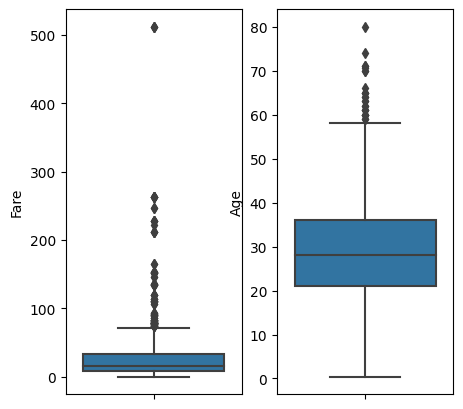

In [470]:
# using BoxPlot
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y="Fare", data=df)
plt.subplot(1, 2, 2)
sns.boxplot(y="Age", data=df)
plt.show()

In [471]:
#replace
numeric_columns= df.select_dtypes("number").columns
for col in numeric_columns:

  Q1=np.quantile(df[col], .25)
  Q3=np.quantile(df[col], .75)
  IQR=Q3 - Q1
  upper=Q3 + 1.5 * IQR
  lower=Q1 - 1.5 * IQR

  upper_val_to_replace = df[df[col]>upper][col].values
  df[col]=df[col].replace(upper_val_to_replace,upper)

  lower_val_to_replace = df[df[col]<lower][col].values
  df[col]=df[col].replace(lower_val_to_replace,lower)
df.head(2)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1


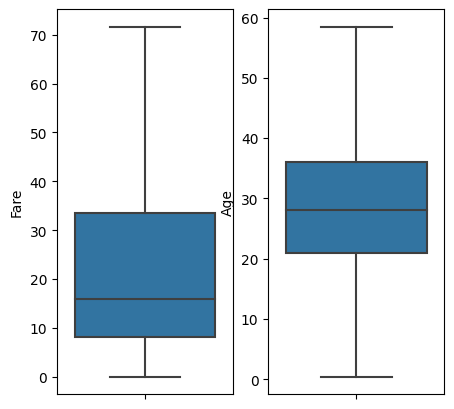

In [472]:
# using BoxPlot
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y="Fare", data=df)
plt.subplot(1, 2, 2)
sns.boxplot(y="Age", data=df)
plt.show()

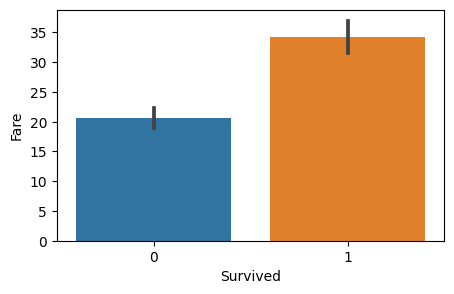

In [473]:
# relation between survial and fare
plt.figure(figsize=(5, 3))
sns.barplot(x='Survived', y='Fare', data=df)
plt.show()
# there is a relation between fare and survial status

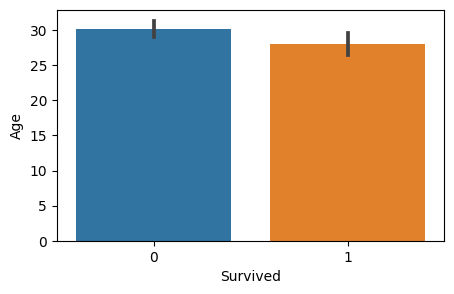

In [474]:
# check if Age had effect on survival
plt.figure(figsize=(5, 3))
sns.barplot(x='Survived', y='Age', data=df)
plt.show()
#no relation between age and survival status

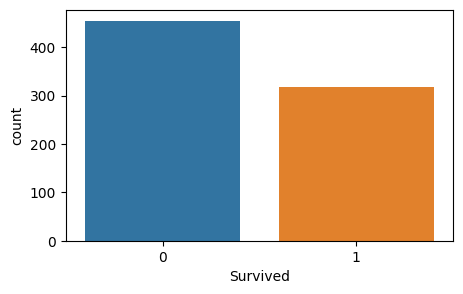

In [475]:
# Categorical Features distribution
plt.figure(figsize=(5, 3))
sns.countplot(x="Survived", data=df)
plt.show()


In [476]:
agg=df.pivot_table(index="Survived",columns="Pclass",values ="Age",aggfunc=len)

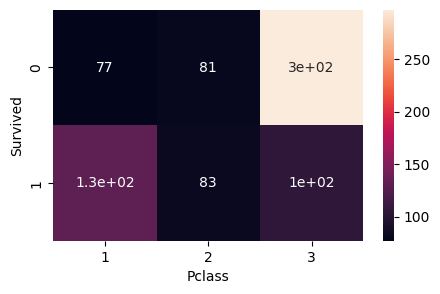

In [477]:
plt.figure(figsize=(5, 3))
sns.heatmap(agg,annot=True)
plt.show()


In [478]:
#feature extraction
family = (df["SibSp"].astype('int') + df["Parch"].astype('int')).astype('category')
df.insert(4,"Family",family)
df

,Pclass,Sex,Age,SibSp,Family,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,1,0,7.2500,S,0
1,1,female,38.0,1,1,0,71.2833,C,1
2,3,female,26.0,0,0,0,7.9250,S,1
3,1,female,35.0,1,1,0,53.1000,S,1
4,3,male,35.0,0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,5,29.1250,Q,0
887,1,female,19.0,0,0,0,30.0000,S,1
888,3,female,28.0,1,3,2,23.4500,S,0
889,1,male,26.0,0,0,0,30.0000,C,1


In [479]:
df.drop(["SibSp"],axis=1 ,inplace=True)
df.drop(["Parch"],axis=1 ,inplace=True)



In [480]:
#normalization values of age and fare  to values between 0&1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df.Age=scaler.fit_transform(df[["Age"]])

In [481]:
df.Fare=scaler.fit_transform(df[["Fare"]])

In [482]:
df

,Pclass,Sex,Age,Family,Fare,Embarked,Survived
0,3,male,0.371556,1,0.101151,S,0
1,1,female,0.647039,1,0.994535,C,1
2,3,female,0.440427,0,0.110569,S,1
3,1,female,0.595386,1,0.740844,S,1
4,3,male,0.595386,0,0.112313,S,0
...,...,...,...,...,...,...,...
885,3,female,0.664256,5,0.406348,Q,0
887,1,female,0.319904,0,0.418556,S,1
888,3,female,0.474862,3,0.327171,S,0
889,1,male,0.440427,0,0.418556,C,1


In [483]:
#label encoding for sex
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.Sex=le.fit_transform(df.Sex)
df

,Pclass,Sex,Age,Family,Fare,Embarked,Survived
0,3,1,0.371556,1,0.101151,S,0
1,1,0,0.647039,1,0.994535,C,1
2,3,0,0.440427,0,0.110569,S,1
3,1,0,0.595386,1,0.740844,S,1
4,3,1,0.595386,0,0.112313,S,0
...,...,...,...,...,...,...,...
885,3,0,0.664256,5,0.406348,Q,0
887,1,0,0.319904,0,0.418556,S,1
888,3,0,0.474862,3,0.327171,S,0
889,1,1,0.440427,0,0.418556,C,1


In [484]:
#one hot encoding for Embarked coloumn
df=pd.get_dummies(df,columns=["Embarked"])



In [485]:
df
#data set is ready for ML model

,Pclass,Sex,Age,Family,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0.371556,1,0.101151,0,0,0,1
1,1,0,0.647039,1,0.994535,1,1,0,0
2,3,0,0.440427,0,0.110569,1,0,0,1
3,1,0,0.595386,1,0.740844,1,0,0,1
4,3,1,0.595386,0,0.112313,0,0,0,1
...,...,...,...,...,...,...,...,...,...
885,3,0,0.664256,5,0.406348,0,0,1,0
887,1,0,0.319904,0,0.418556,1,0,0,1
888,3,0,0.474862,3,0.327171,0,0,0,1
889,1,1,0.440427,0,0.418556,1,1,0,0
